In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import load_iris
data = load_iris()

In [8]:
df = pd.DataFrame(data.data, columns= data.feature_names)
df['Target'] = data.target

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
#Splitting the data into X and Y
X = df.drop('Target', axis = 1)
y = df.Target

In [12]:
X.shape

(150, 4)

In [13]:
y.shape

(150,)

In [14]:
#Splitting the data into train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state= 1, test_size= 0.3)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


1. Write a Python program to train a Decsion Tree Classifier on the iris dataset and print the model accuracy

In [18]:
#Train The Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [19]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [46]:
#Printing the model Accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

In [47]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [48]:
accuracy_score(Y_test, y_pred)

0.9555555555555556

In [ ]:
from sklearn import tree
plt.figure(figsize=(1

2. Write a python program to train a decision tree clasifier using Gini impurity as the criterican and print the feature importances.

In [33]:
classifier = DecisionTreeClassifier(criterion= 'gini', random_state= 1)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [37]:
# Print Feature Importances
feature_importances = pd.DataFrame({'Feature': data.feature_names, 'Importance': classifier.feature_importances_})
print("Feature Importances:\n", feature_importances.sort_values(by='Importance', ascending=False))

Feature Importances:
              Feature  Importance
3   petal width (cm)    0.893892
2  petal length (cm)    0.063170
1   sepal width (cm)    0.021469
0  sepal length (cm)    0.021469


3. Write a python program to train a decision tree classifier using Entropy as the splitting criterion and print the model accuracy.

In [40]:
classifier1 = DecisionTreeClassifier(criterion= 'entropy', random_state= 42)

In [41]:
classifier1.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [49]:
y_pred1 = classifier1.predict(X_test)

In [50]:
accuracy_score(Y_test, y_pred1)

0.9555555555555556

4. Write a Python progtam to train a Decision tree Regressior on a Housing Dataset and evaluate using Mean Squared Error(MSE).

In [51]:
from sklearn.datasets import fetch_california_housing

In [52]:
data = fetch_california_housing()

In [54]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [55]:
df = pd.DataFrame(data.data, columns= data.feature_names)

In [58]:
df['Price'] = data.target

In [59]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [60]:
X = df.drop('Price', axis = 1)
y = df.Price

In [61]:
X.shape

(20640, 8)

In [62]:
y.shape

(20640,)

In [63]:
#Splitting the data into X and Y
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state= 1, test_size= 0.2)

In [66]:
#training the model
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [73]:
y_pred1 = Regressor.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
mean_squared_error(Y_test, y_pred1)

0.5037745443545059

5. Write a Python program to train a Decision Tree Classifier and Visualize the tree using graphviz

In [87]:
data1= load_iris()
x = data1.data
Y= data1.target

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, random_state= 1, test_size= 0.2)

In [90]:
clf = DecisionTreeClassifier(criterion= 'gini', random_state= 42)

In [91]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

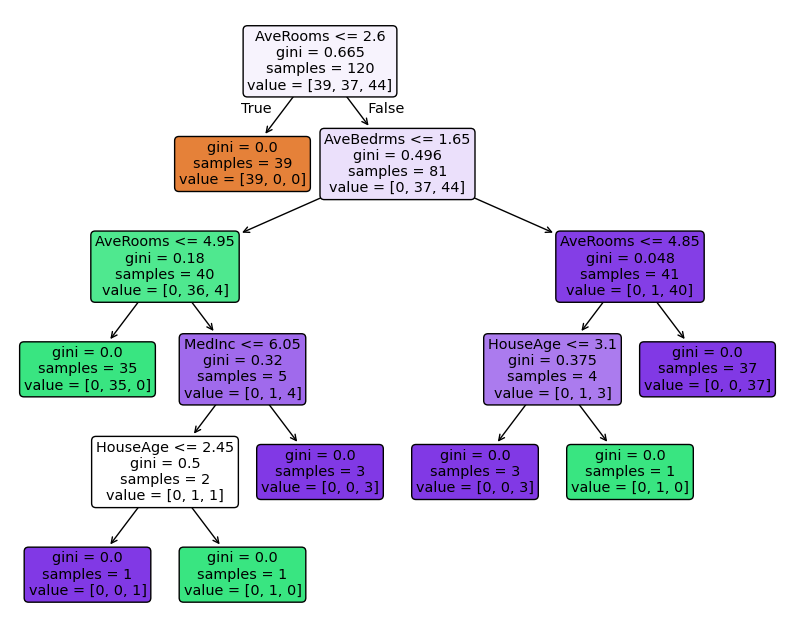

In [95]:
plt.figure(figsize= (10,8))
tree.plot_tree(clf, filled= True, feature_names= data.feature_names, rounded= True)
plt.show()

6. Write a Python Program to train a Decision tree classifer with a maximum depth of 3 and compare its accuracy with a fully grown tree.

In [96]:
from sklearn.datasets import load_diabetes

In [101]:
data1 = load_iris()

In [108]:
clf_max_depth = DecisionTreeClassifier(max_depth= 3, criterion= 'gini', random_state= 42)
clf_Full = DecisionTreeClassifier(criterion= 'gini', random_state= 42)

In [112]:
clf_max_depth.fit(X_train, Y_train)
clf_Full.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [113]:
clf_Full.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [116]:
Y_pred_max_depth = clf_max_depth.predict(X_test)
Y_pred_full = clf_Full.predict(X_test)

In [118]:
print(f"Accuracy of Decision Tree (Max Depth = 3): {accuracy_score(Y_test, Y_pred_max_depth)}")
print(f"Accuracy of Fully Grown Decision Tree: {accuracy_score(Y_test, Y_pred_full)}")


Accuracy of Decision Tree (Max Depth = 3): 0.9666666666666667
Accuracy of Fully Grown Decision Tree: 0.9666666666666667


7. Write a Python program to train a Decision tree Classifier using min_samples_split = 5 and compare its accuracy with a default tree.

In [119]:
clf_limited = DecisionTreeClassifier(criterion="gini", min_samples_split=5, random_state=42)

In [120]:
clf_limited.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=42)

In [121]:
Y_Pred_limited = clf_limited.predict(X_test)

In [124]:
print(f'Accuracy of Decision Tree(Min Samples_split = 5): {accuracy_score(Y_test, Y_Pred_limited)}')
print(f'Accuracy of Decision Tree: {accuracy_score(Y_test, Y_pred_full)}')


Accuracy of Decision Tree(Min Samples_split = 5): 0.9666666666666667
Accuracy of Decision Tree: 0.9666666666666667


8. Write a Python program to apply feature scaling before training a Decision Tree Classifier and Compare its accuracy with unscaled data

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_sccaled = scaler.transform(X_test)

In [126]:
clf_scaled = DecisionTreeClassifier(criterion= 'gini', random_state= 1)
clf_scaled.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(random_state=1)

In [127]:
Y_pred_scaled = clf_scaled.predict(X_test_sccaled)

In [129]:
print(f"Accuracy of Decision Tree (Without Scaling): {accuracy_score(Y_test, Y_pred_full)}")
print(f"Accuracy of Decision Tree (With Feature Scaling): {accuracy_score(Y_test,Y_pred_scaled)} ")


Accuracy of Decision Tree (Without Scaling): 0.9666666666666667
Accuracy of Decision Tree (With Feature Scaling): 0.9666666666666667 


9. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.

In [132]:
# Import necessary libraries
from sklearn.multiclass import OneVsRestClassifier

iris = load_iris()
X, y = iris.data, iris.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ovr_classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion="gini", random_state=42))
ovr_classifier.fit(X_train, y_train)

y_pred = ovr_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Accuracy of Decision Tree Classifier with One-vs-Rest (OvR):", accuracy)


Accuracy of Decision Tree Classifier with One-vs-Rest (OvR): 1.0


10. Write a Python program to train a Decision tree classifier and display the feature Importance score

In [133]:
iris = load_iris()
X, y = iris.data, iris.target 

clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X, y)

feature_importance = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': iris.feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print("Feature Importance Scores:")
print(feature_importance_df)


Feature Importance Scores:
             Feature  Importance
2  petal length (cm)    0.564056
3   petal width (cm)    0.422611
0  sepal length (cm)    0.013333
1   sepal width (cm)    0.000000


11. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.

Mean Squared Error (Max Depth = 5): 0.00926380015355575
Mean Squared Error (Fully Grown Tree): 0.010451768716348698


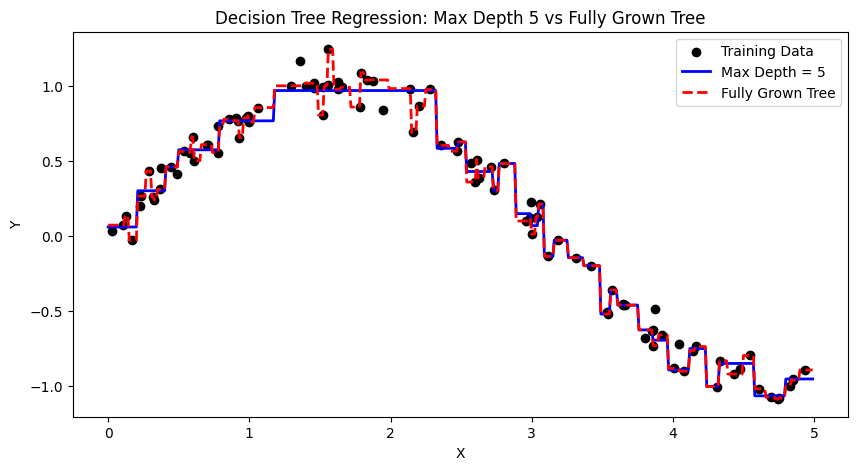

In [135]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # Features
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Target with noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_limited.fit(X_train, y_train)

reg_full = DecisionTreeRegressor(random_state=42)
reg_full.fit(X_train, y_train)

y_pred_limited = reg_limited.predict(X_test)
y_pred_full = reg_full.predict(X_test)

mse_limited = mean_squared_error(y_test, y_pred_limited)
mse_full = mean_squared_error(y_test, y_pred_full)

print("Mean Squared Error (Max Depth = 5):", mse_limited)
print("Mean Squared Error (Fully Grown Tree):", mse_full)

X_grid = np.arange(0, 5, 0.01).reshape(-1, 1)  # Fine grid for plotting
plt.figure(figsize=(10, 5))

y_grid_limited = reg_limited.predict(X_grid)
y_grid_full = reg_full.predict(X_grid)

plt.scatter(X, y, color="black", label="Training Data")

plt.plot(X_grid, y_grid_limited, color="blue", label="Max Depth = 5", linewidth=2)
plt.plot(X_grid, y_grid_full, color="red", linestyle="dashed", label="Fully Grown Tree", linewidth=2)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Decision Tree Regression: Max Depth 5 vs Fully Grown Tree")
plt.legend()
plt.show()


12. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning(CCP), and Visualize  its effect on accuracy

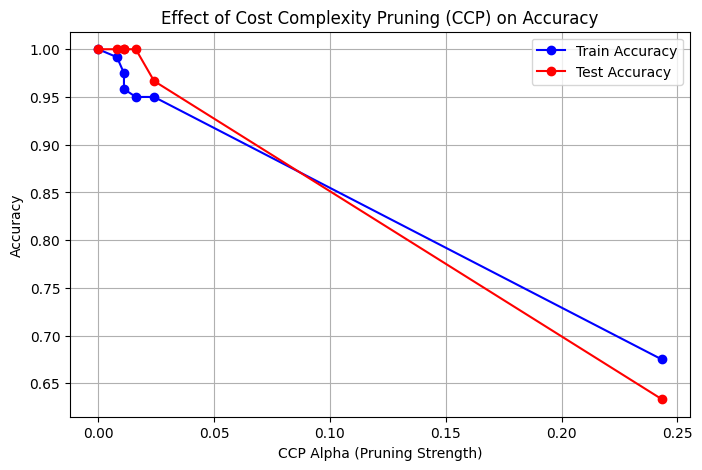

In [141]:
from sklearn.model_selection import cross_val_score



clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  
ccp_alphas = ccp_alphas[:-1] 

train_scores = []
test_scores = []

for alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf_pruned.fit(X_train, y_train)
    train_scores.append(clf_pruned.score(X_train, y_train))
    test_scores.append(clf_pruned.score(X_test, y_test))

plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker="o", label="Train Accuracy", color="blue")
plt.plot(ccp_alphas, test_scores, marker="o", label="Test Accuracy", color="red")

plt.xlabel("CCP Alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.title("Effect of Cost Complexity Pruning (CCP) on Accuracy")
plt.legend()
plt.grid()
plt.show()


13. Write a Python program to train a Decision tree classifier and evaluate its performance using precsion, Recall, and F1-Score

In [140]:
from sklearn.metrics import classification_report


clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



14. Write a Python Program to train a Decsion Tree Classifier and Visualize the Confusion matrix using Seaborn

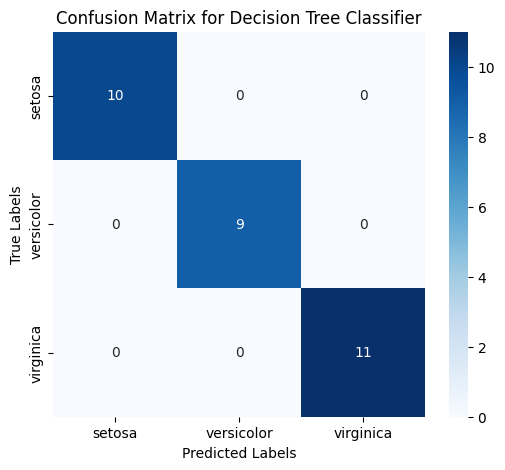

In [142]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()


15. Write a Python Program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.

In [145]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

test_accuracy = best_clf.score(X_test, y_test)
print("Test Set Accuracy with Best Parameters:", test_accuracy)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Best Accuracy Score: 0.9416666666666668
Test Set Accuracy with Best Parameters: 1.0
